In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("emotions_50.csv")
df.head()

,Unnamed: 0,text,label
0,305154,i feel pleasant staying away from the former,1
1,53638,i just feel helpless right now though,0
2,53323,i am happy to be here on our farm and i feel o...,1
3,144955,i feel like its rude to draft someone into a h...,3
4,241468,i feel that it did not quite linger on that fe...,4


In [3]:
X = df.text
y = df.label
print(X.head())
print(y.head())

0         i feel pleasant staying away from the former
1                i just feel helpless right now though
2    i am happy to be here on our farm and i feel o...
3    i feel like its rude to draft someone into a h...
4    i feel that it did not quite linger on that fe...
Name: text, dtype: object
0    1
1    0
2    1
3    3
4    4
Name: label, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   text        50000 non-null  object
 2   label       50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(45000,)
(5000,)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  263900


In [7]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(45000, 263900)
(5000, 263900)


In [8]:
from sklearn.svm import SVC
clf=SVC(verbose=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

[LibSVM]

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1369   41    6   21   20    1]
 [  32 1561   32    5    6    3]
 [  23  155  270    1    0    0]
 [  68   46    2  570   14    0]
 [  46   58    0   19  438   10]
 [  22   39    0    0   29   93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1458
           1       0.82      0.95      0.88      1639
           2       0.87      0.60      0.71       449
           3       0.93      0.81      0.87       700
           4       0.86      0.77      0.81       571
           5       0.87      0.51      0.64       183

    accuracy                           0.86      5000
   macro avg       0.87      0.76      0.80      5000
weighted avg       0.86      0.86      0.86      5000

Accuracy: 0.8602


Accuracy Score        :  0.8602
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1458
           1       0.82      0.95      0.88      1639
           2       0.87      0.60      0.71       449
           3       0.93      0.81      0.87       700
           4       0.86      0.77      0.81       571
           5       0.87      0.51      0.64       183

    accuracy                           0.86      5000
   macro avg       0.87      0.76      0.80      5000
weighted avg       0.86      0.86      0.86      5000



<Axes: >

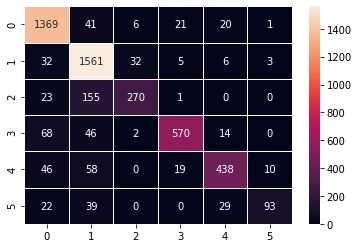

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
cfm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [15]:
test_score = clf.score(X_test, y_test)
print("Accuracty = ", test_score)

Accuracty =  0.8602


In [16]:
# K folds cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state=2, shuffle = True)

In [20]:
# fine tune parameters for lr model
from sklearn.model_selection import GridSearchCV

grid_params_svm = {
    'C':[0.1,1,10,100],
    'gamma':["scale", "auto"],
    'kernel':['linear', 'rbf']
}

svm = SVC()
gs_svm_result = GridSearchCV(svm, grid_params_svm,cv=kf).fit(X_test, y_test)
print(gs_svm_result.best_score_)

0.7438


In [19]:
test = gs_svm_result.best_estimator_.score(X_test, y_test)
gs_svm_result.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [24]:
from sklearn.svm import SVC
clf=SVC(C=10, gamma='scale', kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Accuracy Score        :  0.8602
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1458
           1       0.82      0.95      0.88      1639
           2       0.87      0.60      0.71       449
           3       0.93      0.81      0.87       700
           4       0.86      0.77      0.81       571
           5       0.87      0.51      0.64       183

    accuracy                           0.86      5000
   macro avg       0.87      0.76      0.80      5000
weighted avg       0.86      0.86      0.86      5000



<Axes: >

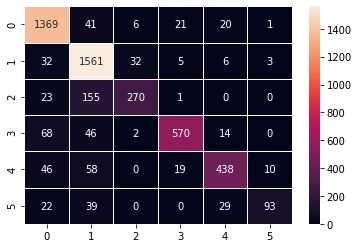

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
cfm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [22]:
from sklearn.metrics import precision_score, recall_score
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')

print("Micro Precision:", precision_micro)
print("Micro Recall:", recall_micro)

print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)


Micro Precision: 0.8602
Micro Recall: 0.8602
Macro Precision: 0.8714166118568571
Macro Recall: 0.7637102545113611
